LOGISTIC REGRESSION

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Read data
df = pd.read_csv('joined_cyberbullying_tweet.csv')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy:  0.8841540043413687
Testing Accuracy:  0.8160630640923112

Testing Classification Report:
                     precision    recall  f1-score   support

                age       0.94      0.97      0.95      1532
          ethnicity       0.97      0.96      0.97      1509
             gender       0.88      0.79      0.83      1479
  not_cyberbullying       0.58      0.52      0.55      1240
other_cyberbullying       0.60      0.70      0.64      1382
           religion       0.88      0.90      0.89      1611

           accuracy                           0.82      8753
          macro avg       0.81      0.80      0.80      8753
       weighted avg       0.82      0.82      0.82      8753



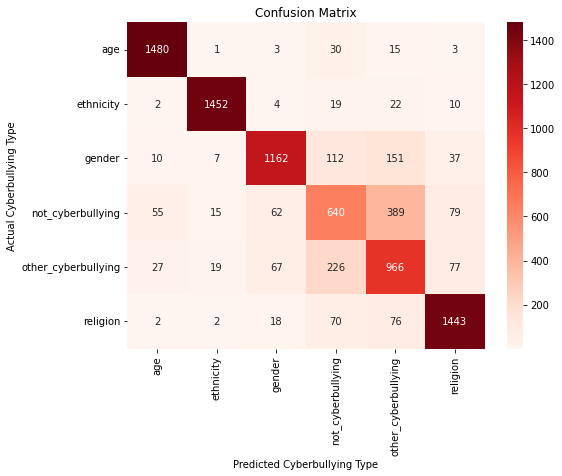

In [43]:
x = df['tweet_text']
y = df['cyberbullying_type']

# Label Encoding
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

# Split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# Feature Extraction
log_reg_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TF-IDF vectorizer to convert text data into feature vectors
    ('log_reg', LogisticRegression())
])

# Train Model
log_reg_pipeline.fit(x_train,y_train)

# Predict
y_train_pred = log_reg_pipeline.predict(x_train)
y_test_pred = log_reg_pipeline.predict(x_test)

# Training Set Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy: ", train_accuracy)

# Testing Set Performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: ",test_accuracy)
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred,target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Cyberbullying Type')
plt.xlabel('Predicted Cyberbullying Type')
plt.show()

Hyperparameter Tuning

In [34]:
# Grid Search
param_grid = {
    'log_reg__C': [0.1, 1, 10],                       # regularization strength
    'log_reg__penalty': ['l1','l2'],                  # regularization term that penalizes large coefficients (l2: ridge regularization)
    'log_reg__max_iter': [200, 300, 1000],            # max number of iterations
    'vectorizer__max_features': [1000, 5000, 10000],  # max number of features
    'vectorizer__ngram_range': [(1, 1), (1, 2)]       # n-gram range 
}
 
grid_search = GridSearchCV(log_reg_pipeline, param_grid=param_grid, 
                           cv=5,        # 5-fold cross-validation. Dataset split into 5 folds. Model is trained and evaluated 5 times
                           scoring='accuracy', 
                           n_jobs=-1,   # num of jobs to run in parallel. -1 means uses all available CPU cores
                           verbose=1)   # control verbosity of output. 
grid_search.fit(x_train, y_train)
 
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validated Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages

Best Hyperparameters: {'log_reg__C': 1, 'log_reg__max_iter': 200, 'log_reg__penalty': 'l2', 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}
Best Mean Cross-validated Score: 0.8254027296336008


In [45]:
# Tuned Logistic Regression
best_param_lr = {'C': 1, 'max_iter': 200, 'penalty': 'l2'}
best_param_vec = {'max_features': 10000, 'ngram_range': (1, 2)}

log_reg_tuned_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(**best_param_vec)),
    ('log_reg', LogisticRegression(**best_param_lr))
])

log_reg_tuned_pipeline.fit(x_train,y_train)
y_train_pred_best = log_reg_tuned_pipeline.predict(x_train)
y_test_pred_best = log_reg_tuned_pipeline.predict(x_test)

# Training Set Performance after Hyperparameter Tuning
train_accuracy = accuracy_score(y_train, y_train_pred_best)
print("Training Accuracy after Hyperparameter Tuning: ",train_accuracy)

# Testing Set Performance after Hyperparameter Tuning
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print("Testing Accuracy after Hyperparameter Tuning: ",test_accuracy)
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_best, target_names=label_encoder.classes_))


Training Accuracy after Hyperparameter Tuning:  0.8886667428310293
Testing Accuracy after Hyperparameter Tuning:  0.8192619673254884

Testing Classification Report:
                     precision    recall  f1-score   support

                age       0.94      0.97      0.96      1532
          ethnicity       0.97      0.97      0.97      1509
             gender       0.88      0.79      0.83      1479
  not_cyberbullying       0.59      0.50      0.54      1240
other_cyberbullying       0.60      0.71      0.65      1382
           religion       0.88      0.90      0.89      1611

           accuracy                           0.82      8753
          macro avg       0.81      0.81      0.81      8753
       weighted avg       0.82      0.82      0.82      8753



In [27]:
x = df['tweet_text']
y = df['cyberbullying_type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Vectorization
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Get feature names
print(x_train_vectorized)

# # Print some information about the vectorized data
# print("Shape of vectorized data:", x_train_vectorized.shape)
# print("Number of features:", len(feature_names))
# print("Example feature names:", feature_names[:10])  # Print the first 10 feature names
# print("Example feature IDF values:", vectorizer.idf_[:10]) 

  (0, 2241)	0.2771160321117835
  (0, 5672)	0.27897958589473154
  (0, 6908)	0.1865382830429673
  (0, 12939)	0.17460871966170066
  (0, 12708)	0.3017752979532965
  (0, 8294)	0.1496174356898675
  (0, 5182)	0.5609665112779377
  (0, 3864)	0.26912868327259787
  (0, 6644)	0.4290220412790707
  (0, 4880)	0.14632790074184995
  (0, 10002)	0.12371798115186326
  (0, 5409)	0.14602436010165407
  (0, 4981)	0.1934527277743729
  (1, 9432)	0.21923449622373395
  (1, 9371)	0.31171633431607404
  (1, 6449)	0.28542027819765997
  (1, 12546)	0.30864126041589074
  (1, 10832)	0.28627586539124816
  (1, 498)	0.2255307955311857
  (1, 11542)	0.1981929646842974
  (1, 9129)	0.1956347892295721
  (1, 2063)	0.28376027648983415
  (1, 6802)	0.32157840275838356
  (1, 9964)	0.16856079585203504
  (1, 11964)	0.22054357983032732
  :	:
  (35010, 11977)	0.5020070413422362
  (35010, 11718)	0.501572338076012
  (35010, 10674)	0.4907374398709706
  (35010, 7648)	0.5055599719406814
  (35011, 7530)	0.3492131941973806
  (35011, 9045)	0.274

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy:  0.8841540043413687
Testing Accuracy:  0.8160630640923112

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1532
           1       0.97      0.96      0.97      1509
           2       0.88      0.79      0.83      1479
           3       0.58      0.52      0.55      1240
           4       0.60      0.70      0.64      1382
           5       0.88      0.90      0.89      1611

    accuracy                           0.82      8753
   macro avg       0.81      0.80      0.80      8753
weighted avg       0.82      0.82      0.82      8753



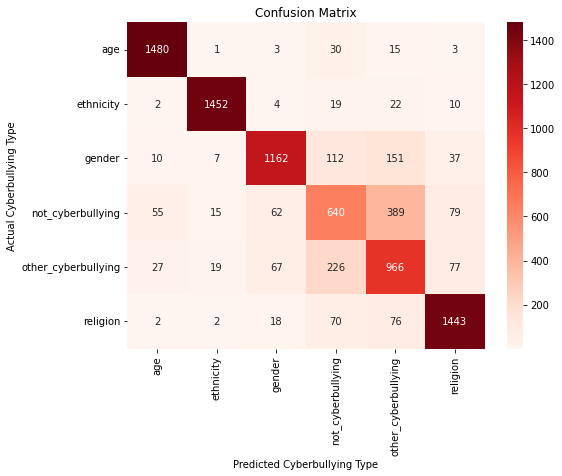

In [28]:

# Train Model
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized,y_train_encoded)

# Predict
y_train_pred = log_reg.predict(x_train_vectorized)
y_test_pred = log_reg.predict(x_test_vectorized)

# Training Set Performance
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print("\nTraining Accuracy: ", train_accuracy)

# Testing Set Performance
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print("Testing Accuracy: ",test_accuracy)
print("\nTesting Classification Report:")
print(classification_report(y_test_encoded, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Cyberbullying Type')
plt.xlabel('Predicted Cyberbullying Type')
plt.show()